In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from pprint import pprint
from scipy.interpolate import griddata
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.validation import make_valid
from scipy.spatial import ConvexHull
import math


In [9]:
with open(r"SLAM.pickle", "rb") as input_file:
    e = pickle.load(input_file)

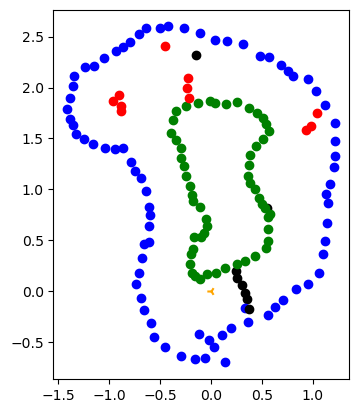

In [10]:
positions=e['positions']
ids=e['ids']
for i,pos_zip in enumerate(zip(positions, ids)):
    # print(pos_zip[1])
    col=pos_zip[1]%3
    if col==0:
        col2='green'
    elif col==1:
        col2='red'
    elif col==2:
        col2='blue'
    if pos_zip[1]<100:
        col2='black'
    plt.scatter(*pos_zip[0], color=col2)

plt.scatter(0,0, color='orange',marker='3',)
plt.gca().set_aspect('equal')
plt.show()

In [11]:
positions_array=np.array(positions)

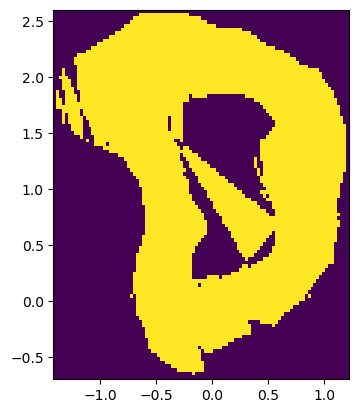

In [12]:
positions_array=np.array(positions)

mask_external=(ids%3==2) & (ids>=100) & (ids<=1000)
mask_internal = (ids%3==0)& (ids>=100) & (ids<=1000)

positions_external=positions_array[mask_external]
positions_internal=positions_array[mask_internal]

# Create polygons from the points
poly1 = Polygon(positions_external)
poly2 = Polygon(positions_internal)

x = np.linspace(min(np.concatenate([positions_external[:, 0], positions_internal[:, 0]])), max(np.concatenate([positions_external[:, 0], positions_internal[:, 0]])), 100)
y = np.linspace(min(np.concatenate([positions_external[:, 1], positions_internal[:, 1]])), max(np.concatenate([positions_external[:, 1], positions_internal[:, 1]])), 100)
X, Y = np.meshgrid(x, y)

# Create a mask where the pixels inside the first circle and outside the second circle are set to 1, and all others are set to 0
mask = np.array([[poly1.contains(Point(x[i], y[j])) and not poly2.contains(Point(x[i], y[j])) for i in range(len(x))] for j in range(len(y))])

plt.imshow(mask, interpolation='nearest', origin='lower', extent=[min(x), max(x), min(y), max(y)])
plt.show()

In [13]:
poly1.is_valid

False

In [14]:
poly1.exterior.coords[:]

[(0.3582500587133168, -0.3039803519321408),
 (0.33606642123465175, -0.170198512594106),
 (0.5556391426486164, -0.23918165526454696),
 (0.6272181472928308, -0.15800525632574486),
 (0.706249119480429, -0.08698007509131371),
 (0.9512718679735428, 0.06884529105573418),
 (0.8310611176225762, 0.024004362992077387),
 (1.0987716012182849, 0.3680676408084661),
 (1.056832135969151, 0.17559149158632886),
 (1.1421851797196527, 0.6700998450239248),
 (1.1299921989237547, 0.9511233545483554),
 (1.152317447921873, 0.8658621998798091),
 (1.1153266501120385, 0.4963554705401499),
 (1.165223856625857, 1.0480474053185889),
 (1.2083534767725663, 1.2151369094769677),
 (1.2200665658509673, 1.328090645068756),
 (1.2207390013268509, 1.4758338582228852),
 (1.1182509804180407, 1.8293420785184593),
 (1.21554278983377, 1.6549490544703187),
 (1.0289027788458598, 1.96571858747672),
 (0.9537272908548334, 2.0830078191770363),
 (0.8076678034469975, 2.110548034301205),
 (0.756060252483055, 2.165128968130445),
 (0.5734807

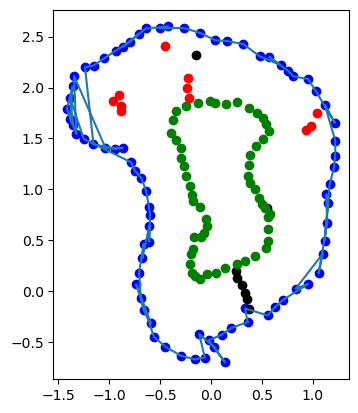

In [17]:
plt.plot(*poly1.exterior.xy)
plt.gca().set_aspect('equal')
for i,pos_zip in enumerate(zip(positions, ids)):
    # print(pos_zip[1])
    col=pos_zip[1]%3
    if col==0:
        col2='green'
    elif col==1:
        col2='red'
    elif col==2:
        col2='blue'
    if pos_zip[1]<=100:
        col2='black'
    plt.scatter(*pos_zip[0], color=col2)
plt.show()


In [19]:
# Algorithm to find the polygon

def distance(node_i, positions_external):
    # return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
    return np.sqrt((positions_external[node_i]- positions_external[node_i+1])**2)



n=positions_external.shape[0]
max_dist = 10

for node_i in range(n-1):
    if distance(node_i, positions_external)>max_dist:
        
        


